The correlation coefficient:  0.7615617369755622
The Average Absolute Deviation (AAD) is : 10.726788308505165 %


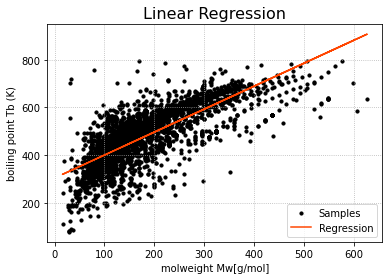

In [3]:
#Task 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df = pd.read_excel (r"C:\Users\jovit\Downloads\data1.xlsx")

x=np.array(df['molweight']).reshape((-1, 1))
y=np.array(df['boiling point (K)'])

model = LinearRegression().fit(x, y)
pred_y = model.predict(x)

r_sq = model.score(x, y)
print("The correlation coefficient: ",(r_sq)**0.5)


AAD = ((abs(pred_y - y)/y)*100).mean() ;
print('The Average Absolute Deviation (AAD) is :',AAD,"%")

plt.title('Linear Regression', fontsize=16)
plt.xlabel('molweight Mw[g/mol]')
plt.ylabel('boiling point Tb (K)')
plt.grid(linestyle=':')
plt.scatter(x, y, color='black', label='Samples', s=10, marker='o')
plt.plot(x, pred_y, c='orangered', label='Regression')
plt.legend()
plt.show()


[5.80984674e-01 2.95000347e-04 1.57984093e-01]
The correlation coefficient:  0.8735605118847779
The Average Absolute Deviation (AAD) of whole data is : 3.0955241481380047 %
The Average Absolute Deviation (AAD) of training set is : 2.2943095778897886 %


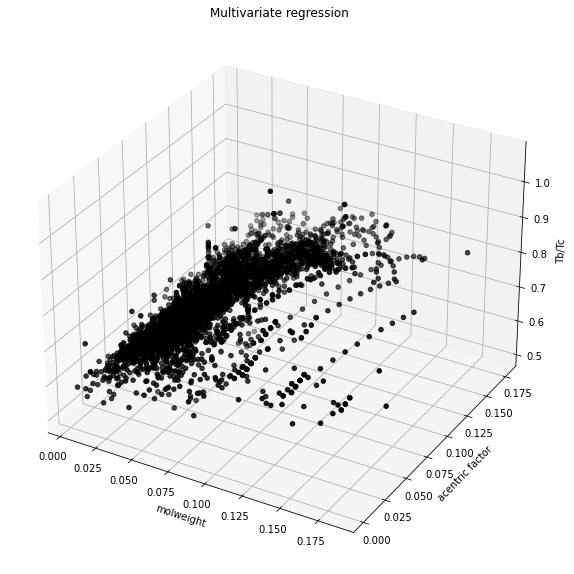

In [2]:
#Task 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


from sklearn.preprocessing import StandardScaler

df = pd.read_excel (r"C:\Users\jovit\Downloads\data1.xlsx")
train_data=df.sample(frac=.0165,random_state=0)
test_data=df.drop(train_data.index)

s=df['boiling point (K)']/df['critical temperature (K)']


Tbr_train = train_data['boiling point (K)']/train_data['critical temperature (K)']
Mw_train = train_data['molweight']
w_train =  train_data['acentric factor'] 



X=[np.ones(100),Mw_train,w_train]
Y= Tbr_train
Xt=np.transpose(X)
A=X@Xt
B=X@Y
Ai=np.linalg.inv(A)
Theta=Ai@B
print(Theta)

x=np.array(Mw_train.values*Theta[1]).reshape((-1, 1))
y=np.array(w_train.values*Theta[2]).reshape((-1, 1))
z=np.ones((100,1))*Theta[0].reshape((-1, 1))

x1=np.array(df['molweight']*Theta[1]).reshape((-1, 1))
y1=np.array(df['acentric factor']*Theta[2]).reshape((-1, 1))
z1=np.ones((6031,1))*Theta[0].reshape((-1, 1))
P1=[z1,x1,y1]

x11=df['molweight']*Theta[1]
y11=df['acentric factor']*Theta[2]


np.ones((6031,1))*Theta[0]

P=[z,x,y]
e=Xt@Theta
Q=Tbr_train.values
lr = LinearRegression()
lr.fit(np.multiply.reduce(P),Q)  

close_predictions = lr.predict(np.multiply.reduce(P1)) 
close_predictions

r_sq = lr.score(np.multiply.reduce(P),Q)
print("The correlation coefficient: ",(r_sq)**(.5))


AAD = ((abs( close_predictions-s.values )/s.values)*100).mean() ;
print('The Average Absolute Deviation (AAD) of whole data is :',AAD,"%")

AAD = ((abs(Tbr_train - e )/Tbr_train)*100).mean() ;
print('The Average Absolute Deviation (AAD) of training set is :',AAD,"%")


from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')

ax.scatter(x1, y1, s, c='Black')


ax.set_title('Multivariate regression')
ax.set_xlabel('molweight')
ax.set_ylabel('acentric factor')
ax.set_zlabel('Tb/Tc')
ax.grid(linestyle=':')





plt.show()





(2713, 2) (3318, 2) (2713, 1) (3318, 1)
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 25)                75        
                                                                 
 dense_40 (Dense)            (None, 25)                650       
                                                                 
 dense_41 (Dense)            (None, 1)                 26        
                                                                 
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
33/33 [==============================] - 1s 6ms/step - loss: 0.0195 - val_loss: 0.0041
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 8.8851e-04
Epoch 3/20
33/33 [==============================] - 0s 3ms/step - loss: 9.7216e

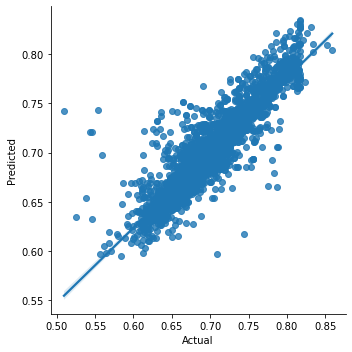

In [43]:
#Task c
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel (r"C:\Users\jovit\Downloads\data1.xlsx")
X = np.array([df['molweight'].values,df['acentric factor'].values]) ; 
Y = np.array([df['boiling point (K)'].values/df['critical temperature (K)'].values])
X=np.transpose(X)
Y=np.transpose(Y)




from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)






from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size= 0.55)


import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')

epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.7)

y_predict = model.predict(X_test)
y_predict.shape



AAD = ((abs(y_predict- y_test)/y_test)*100).mean() ;
print(AAD)


from sklearn.metrics import r2_score
print(r2_score(y_test,y_predict)**.5)


                                
predLR = pd.DataFrame(list(zip(y_test,y_predict)), columns  =['Actual','Predicted'])
predLR = predLR.astype('float')

sns.lmplot(x ='Actual', y ='Predicted', data = predLR)
 
# Show the plot
plt.show()